In [1]:
install.packages("nycflights13")


Die heruntergeladenen Binärpakete sind in 
	/var/folders/tw/w97brhp96zz6rl5nsml2rc880000gn/T//RtmppMcCwz/downloaded_packages


In [2]:
library(tidyverse)
library(nycflights13)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#Exercise 1

In [3]:
data(flights) #Load the data
nrow(flights) #336776 total rows
head(flights) #Let's check what the data looks like

[1] 336776

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [4]:
#to filter, we use the filter() function
#selecting rows that are not NA (!is.na)
flights <- flights %>% filter(!is.na(dep_delay), !is.na(arr_delay)) 
nrow(flights) #Let's check if the number of rows changed. It did, we now only have 327346 rows

[1] 327346

In [5]:
#To create summaries, use group_by in conjunction with summarize()
summary_table <- flights %>% 
                 group_by(carrier) %>% #Does nothing by itself 
                                       #but is automatically used by the summarize function,
                                       #which we call next
                 summarize(avg_dep_delay = mean(dep_delay), #first part (before =) is the name of the new column  
                           avg_arr_delay = mean(arr_delay), #second part (after =)is how we want to calculate it
                           std_arr_delay = sd(arr_delay),
                           )
print(summary_table)

# A tibble: 16 × 4
   carrier avg_dep_delay avg_arr_delay std_arr_delay
   <chr>           <dbl>         <dbl>         <dbl>
 1 9E              16.4          7.38           50.1
 2 AA               8.57         0.364          42.5
 3 AS               5.83        -9.93           36.5
 4 B6              13.0          9.46           42.8
 5 DL               9.22         1.64           44.4
 6 EV              19.8         15.8            49.9
 7 F9              20.2         21.9            61.6
 8 FL              18.6         20.1            54.1
 9 HA               4.90        -6.92           75.1
10 MQ              10.4         10.8            43.2
11 OO              12.6         11.9            48.6
12 UA              12.0          3.56           41.0
13 US               3.74         2.13           33.1
14 VX              12.8          1.76           50.0
15 WN              17.7          9.65           46.9
16 YV              18.9         15.6            52.9


In [6]:
#We once again filter, similar to how we did at the beginning, but this time using a mathematical folmula
summary_table_filtered <- summary_table %>%
                          filter(avg_arr_delay < 5.0) #Filter by putting an equation with the column name

summary_table_filtered

carrier,avg_dep_delay,avg_arr_delay,std_arr_delay
<chr>,<dbl>,<dbl>,<dbl>
AA,8.569130,0.3642909,42.51618
AS,5.830748,-9.9308886,36.48263
DL,9.223950,1.6443409,44.40229
HA,4.900585,-6.9152047,75.12942
UA,12.016908,3.5580111,40.98434
US,3.744693,2.1295951,33.06695
VX,12.756646,1.7644644,49.96645


In [8]:
#sorting is very straightforward
#just use arrange()
summary_table_sorted <- summary_table_filtered %>% arrange(std_arr_delay) 
summary_table_sorted

carrier,avg_dep_delay,avg_arr_delay,std_arr_delay
<chr>,<dbl>,<dbl>,<dbl>
US,3.744693,2.1295951,33.06695
AS,5.830748,-9.9308886,36.48263
UA,12.016908,3.5580111,40.98434
AA,8.569130,0.3642909,42.51618
DL,9.223950,1.6443409,44.40229
VX,12.756646,1.7644644,49.96645
HA,4.900585,-6.9152047,75.12942


In [9]:
#To add the flights column, we will first make a single column with the information we need,
#Then add it to our summary table

#We could also just recreate the entire table, but doing it this way lets us see how
#Adding individual columns works
flight_counts <- flights %>% 
                 group_by(carrier) %>% 
                 summarize(n_flights = n()) #Similar to what we did before, but count flights

flight_counts

carrier,n_flights
<chr>,<int>
9E,17294
AA,31947
AS,709
B6,54049
DL,47658
EV,51108
F9,681
FL,3175
HA,342


In [10]:
#If we want to merge the new column to our existing summary table, we can use a join
#If you are unfamiliar with relational databases, this will merge both columns by matching them to values in a specified column called the "key"
#In our case, we want to match them by carrier

#There are multiple types of joins.
#Their behaviour differs in how they handle rows with a key that's only present in one table but not the other
#In our case, summary_table_sorted only has rows where the delay is < 5, and the flight_counts has all rows

#The types of joins are:
#inner - keeps only rows where the keys are present in both tables
#left - keeps only rows with keys that are in the first table.
#right - keeps only rows with keys that are in the second table
#full - keeps all rows

#In our case, we want just the rows from the first, filtered table, so we choose either inner or left
summary_table_sorted_n_flights <- summary_table_sorted %>% inner_join(flight_counts, by="carrier")
summary_table_sorted_n_flights

#Because joins match by the key, it doesn't matter that one table is sorted and the other isn't

carrier,avg_dep_delay,avg_arr_delay,std_arr_delay,n_flights
<chr>,<dbl>,<dbl>,<dbl>,<int>
US,3.744693,2.1295951,33.06695,19831
AS,5.830748,-9.9308886,36.48263,709
UA,12.016908,3.5580111,40.98434,57782
AA,8.569130,0.3642909,42.51618,31947
DL,9.223950,1.6443409,44.40229,47658
VX,12.756646,1.7644644,49.96645,5116
HA,4.900585,-6.9152047,75.12942,342


In [11]:
#We can use the rank() function to help us determine ranks

summary_table_sorted_ranks <- summary_table_sorted_n_flights %>%
                              #Since we are adding columns, we use mutate()
                              mutate(rank_delay = rank(avg_arr_delay),
                                     rank_consistency = rank(std_arr_delay))

summary_table_sorted_ranks

carrier,avg_dep_delay,avg_arr_delay,std_arr_delay,n_flights,rank_delay,rank_consistency
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
US,3.744693,2.1295951,33.06695,19831,6,1
AS,5.830748,-9.9308886,36.48263,709,1,2
UA,12.016908,3.5580111,40.98434,57782,7,3
AA,8.569130,0.3642909,42.51618,31947,3,4
DL,9.223950,1.6443409,44.40229,47658,4,5
VX,12.756646,1.7644644,49.96645,5116,5,6
HA,4.900585,-6.9152047,75.12942,342,2,7


In [12]:
#Exercise 2
data(diamonds)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


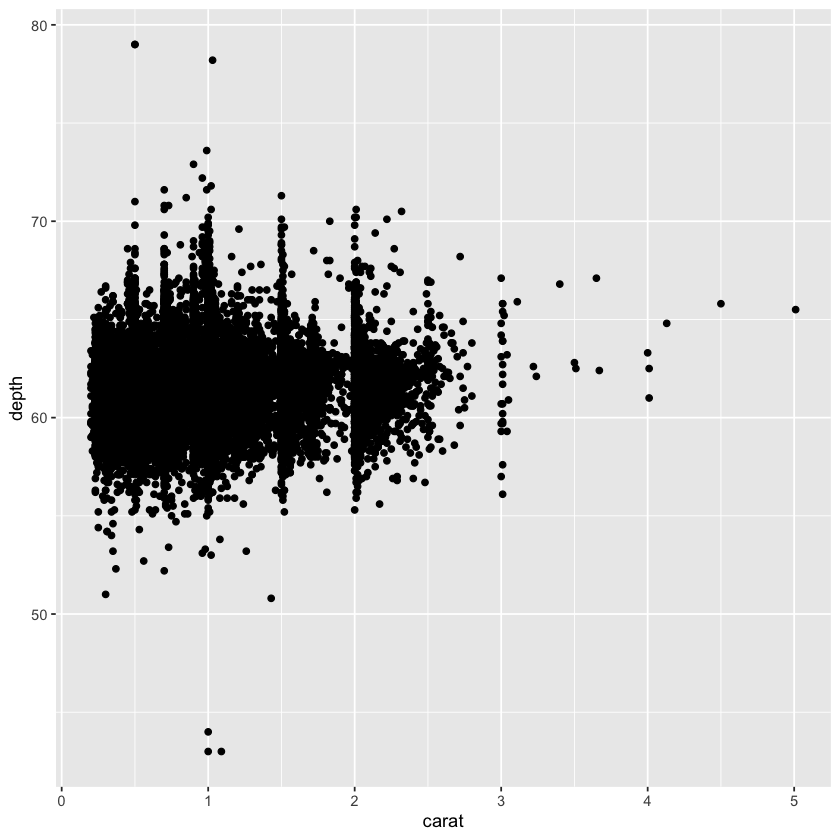

In [13]:
#Same as in the lecture
#First define x and y in the aestethics, then use geom_point() to make scatterplot
diamonds_plot = ggplot(diamonds, aes(x = carat, y = depth)) + geom_point()
diamonds_plot

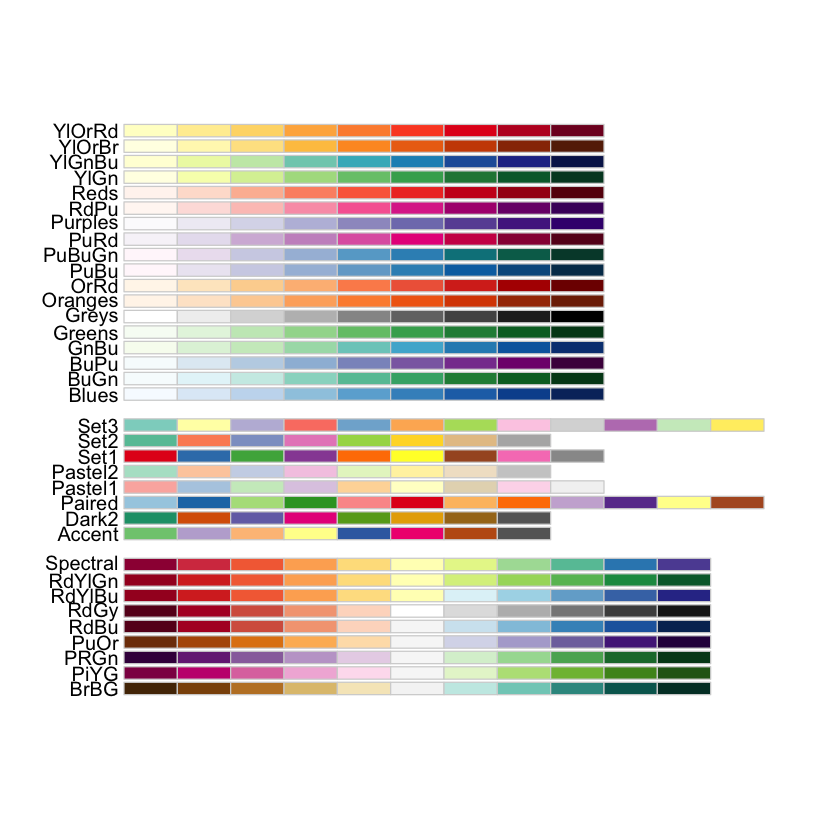

In [14]:
library(RColorBrewer) #Import the brewer library
display.brewer.all() #We can see all the palettes brewer provides

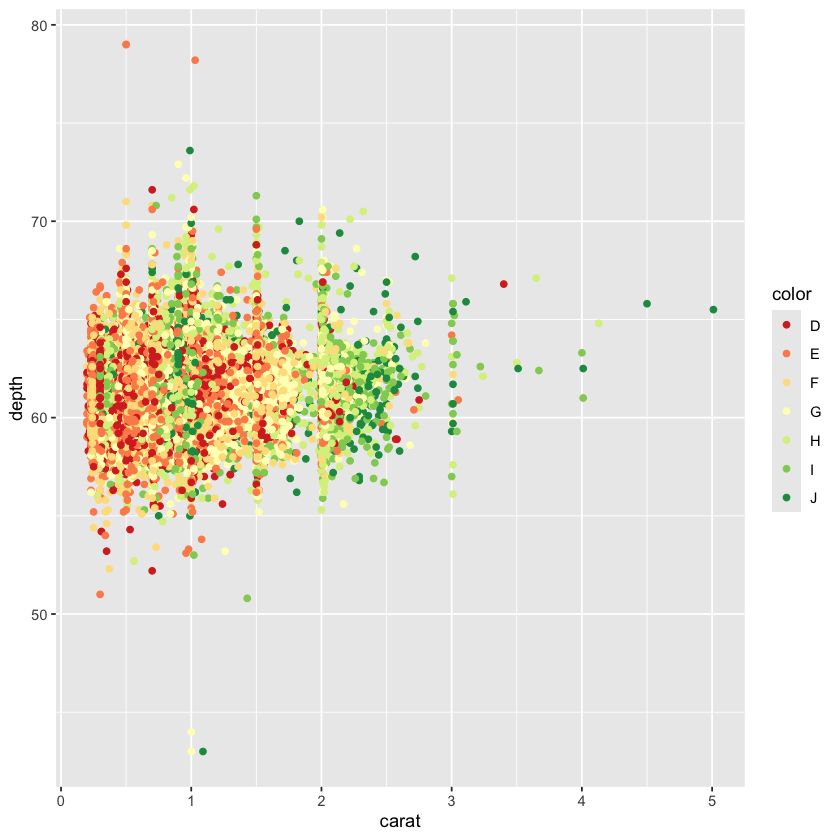

In [15]:
diamonds_plot_colored = ggplot(diamonds, aes(x = carat, y = depth, color = color)) + geom_point()
diamonds_plot_colored = diamonds_plot_colored + scale_colour_brewer(palette="RdYlGn") #simply add the palette theme to our plot
diamonds_plot_colored

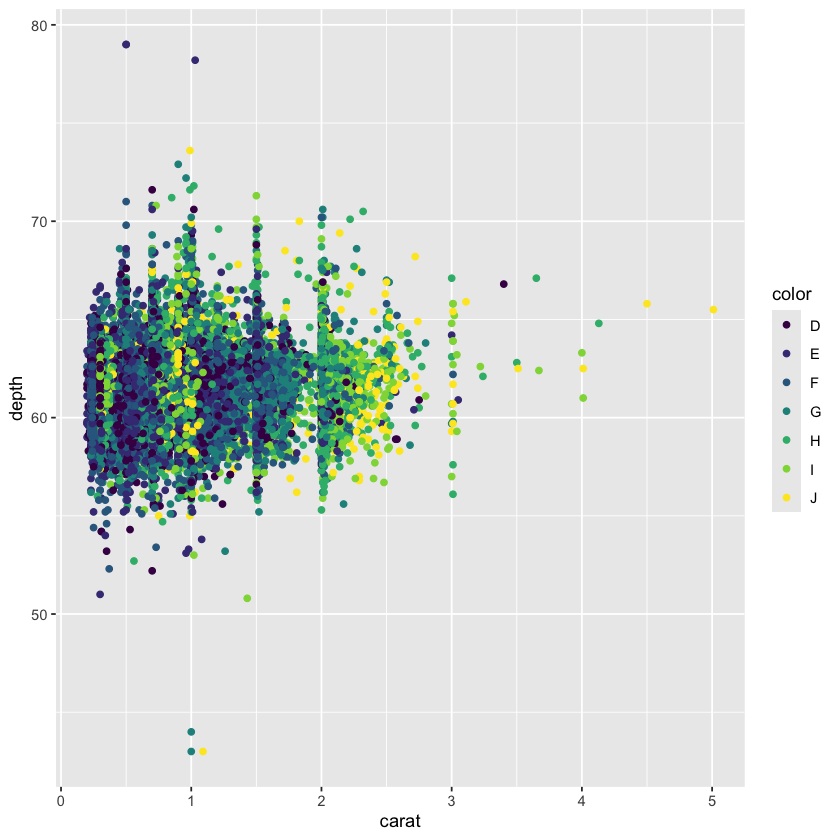

In [16]:
diamonds_plot_colored = ggplot(diamonds, aes(x = carat, y = depth, color = color)) + geom_point()
diamonds_plot_colored

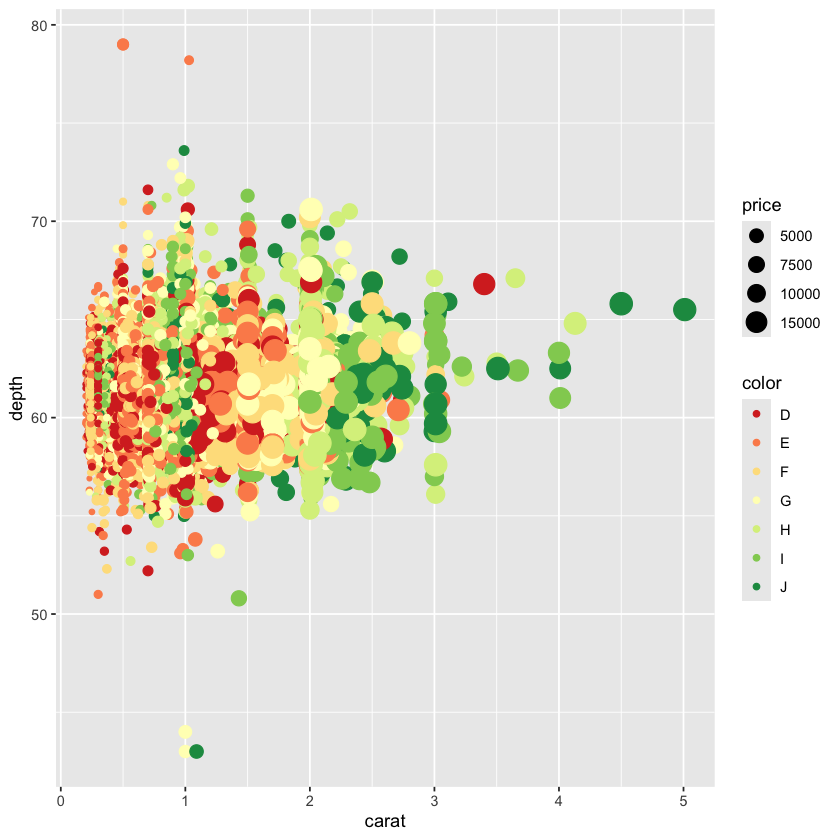

In [17]:
#To add the size, it's the same as adding color or shape
#We can use the scale_size_continuous to customize the scale used and force ggplot to use the 4 specified sizes
diamonds_plot_size = ggplot(diamonds, aes(x = carat, y = depth, color = color, size = price)) + geom_point()
diamonds_plot_size = diamonds_plot_size + scale_colour_brewer(palette="RdYlGn") #simply add the palette theme to our plot
diamonds_plot_size = diamonds_plot_size + scale_size_continuous(breaks= c(5000, 7500, 10000, 15000))
diamonds_plot_size

Warning message:
“Using shapes for an ordinal variable is not advised”


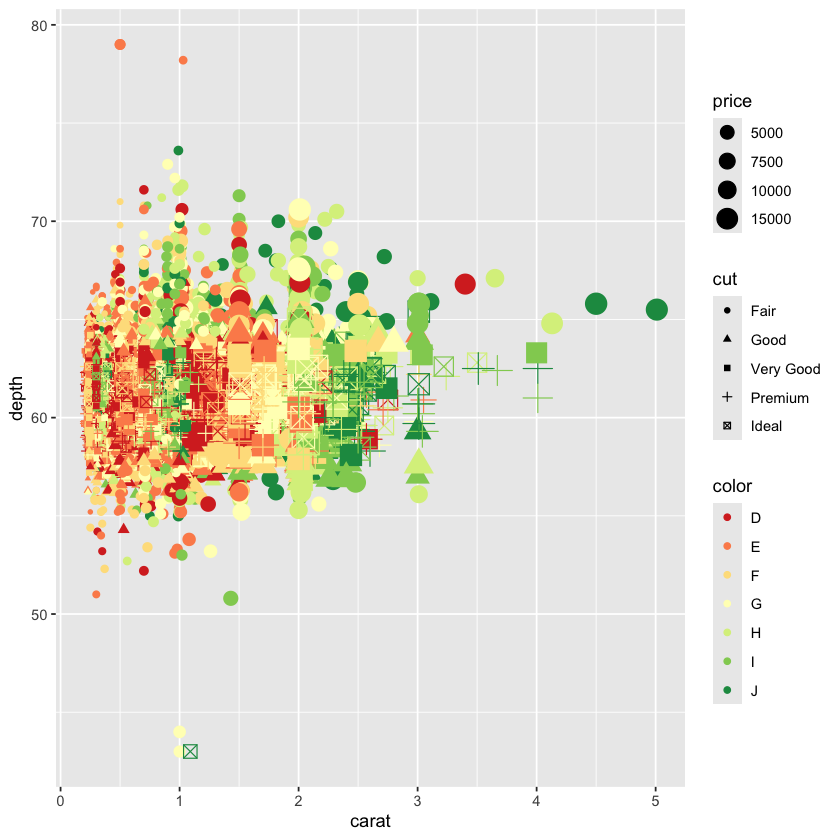

In [18]:
#Finally, the shape
#Similar as the rest, just add it to the aes
diamonds_plot_shape = ggplot(diamonds, aes(x = carat, y = depth, color = color, size = price, shape=cut)) + geom_point()
diamonds_plot_shape = diamonds_plot_shape + scale_colour_brewer(palette="RdYlGn") #simply add the palette theme to our plot
diamonds_plot_shape = diamonds_plot_shape + scale_size_continuous(breaks= c(5000, 7500, 10000, 15000))
diamonds_plot_shape

#We get a warning: “Using shapes for an ordinal variable is not advised”, because cut is ordinal
#i.e., it has an order: fair < good <very good < premium < ideal
#On the other hand, shapes don't have an ordering (it's not obvious that a square is better than a triangle)
#Hence the warning: using shapes loses the information about the ordering

Warning message:
“Using shapes for an ordinal variable is not advised”


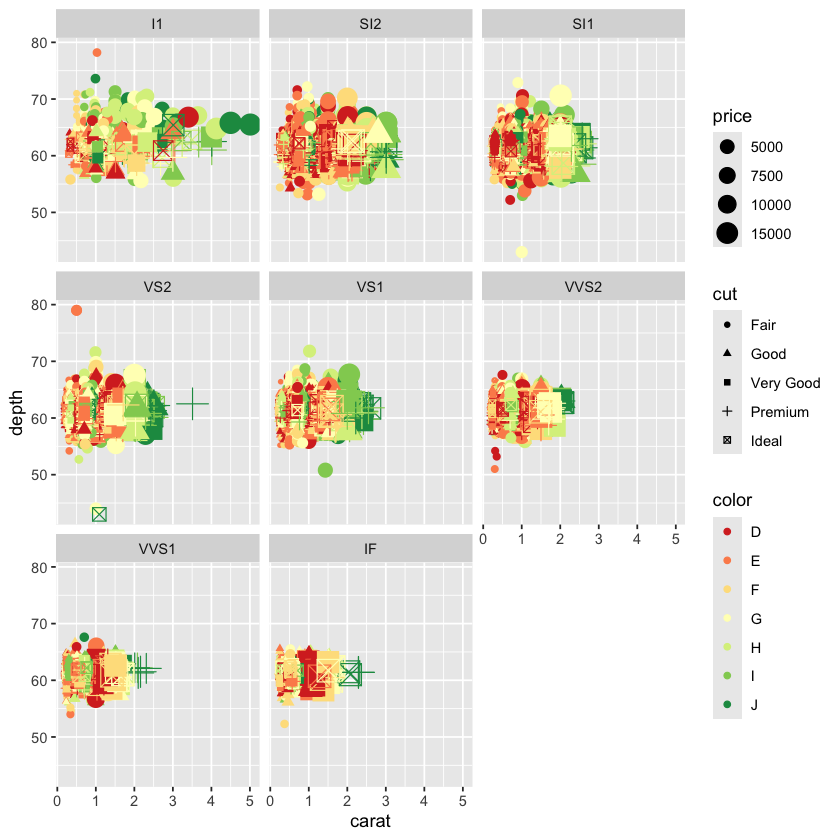

In [19]:
#Now we do facets. Same graph as above, but add facet at the end
diamonds_plot_facet = ggplot(diamonds, aes(x = carat, y = depth, color = color, size = price, shape=cut)) + geom_point()
diamonds_plot_facet = diamonds_plot_facet + scale_colour_brewer(palette="RdYlGn") #simply add the palette theme to our plot
diamonds_plot_facet = diamonds_plot_facet + scale_size_continuous(breaks= c(5000, 7500, 10000, 15000))
diamonds_plot_facet = diamonds_plot_facet + facet_wrap(.~clarity)
diamonds_plot_facet

#Facet wrap gives us an easy grid that allows for independent y axis, so we use that one

In [ ]:
#Exercise 3

In [21]:
install.packages("cowplot")
library(cowplot)


Die heruntergeladenen Binärpakete sind in 
	/var/folders/tw/w97brhp96zz6rl5nsml2rc880000gn/T//RtmppMcCwz/downloaded_packages


In [ ]:
#Let's look at the documentation for plot_grid
#You can do this in r by adding ? to the start of the function
?plot_grid

In [ ]:
#Looks like we need a list of plots, and the dimensions of the grid 
#(which will be 2x2, with the first row having a boxplot and the scatterplot, and the second having just a boxplot)

Warning message:
“Using shapes for an ordinal variable is not advised”


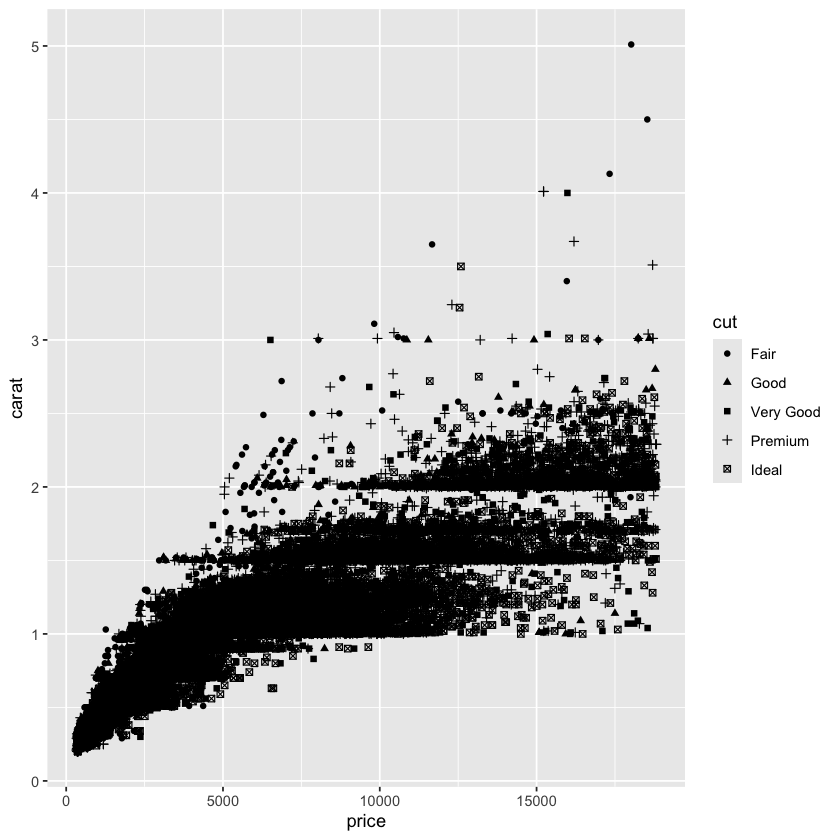

In [23]:
#First, let's do the scatterplot, which is very similar to exercise 2
scatter_plot = ggplot(diamonds, aes(x = price, y = carat, shape=cut)) + geom_point()
scatter_plot

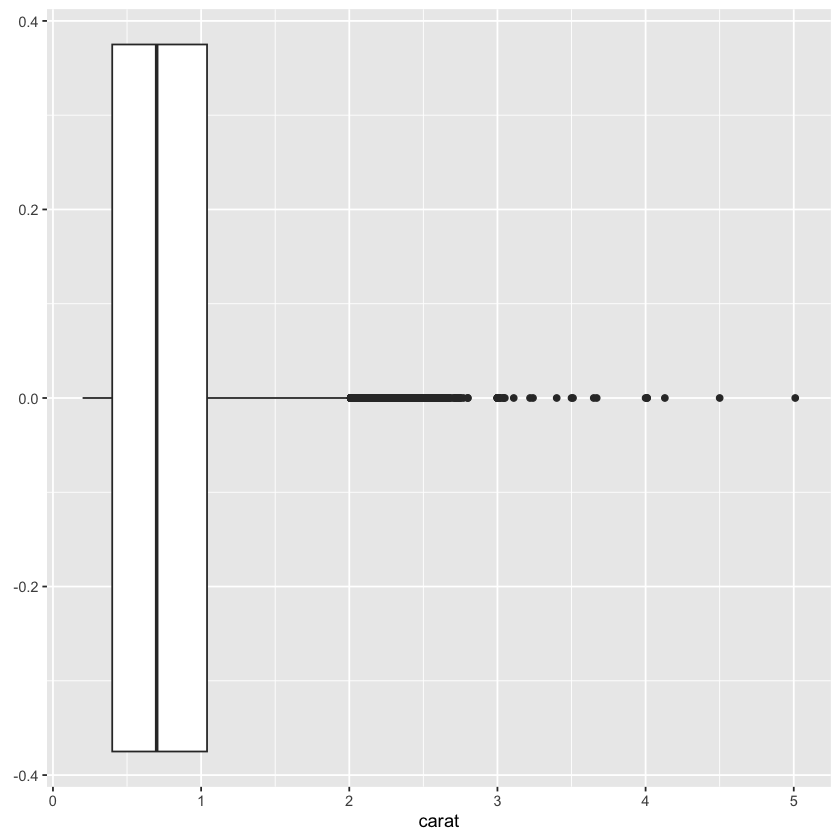

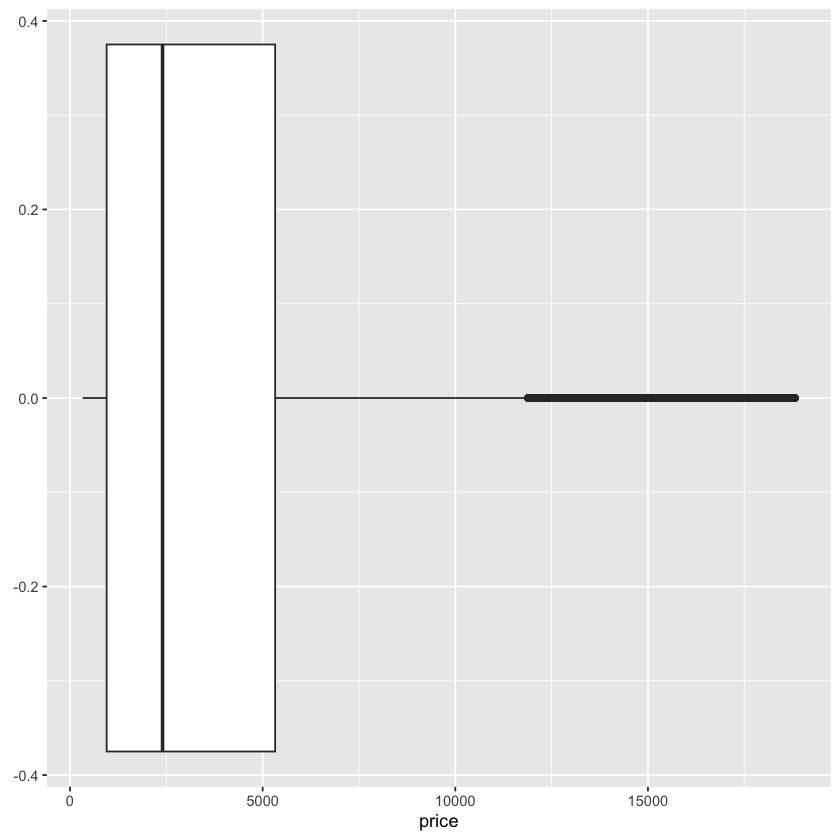

In [24]:
#Now, let's do the boxplots
boxplot_carat = ggplot(diamonds, aes(x=carat)) + geom_boxplot()    
boxplot_carat

boxplot_price = ggplot(diamonds, aes(x=price)) + geom_boxplot()
boxplot_price

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message in as_grob.default(plot):
“Cannot convert object of class logical into a grob.”


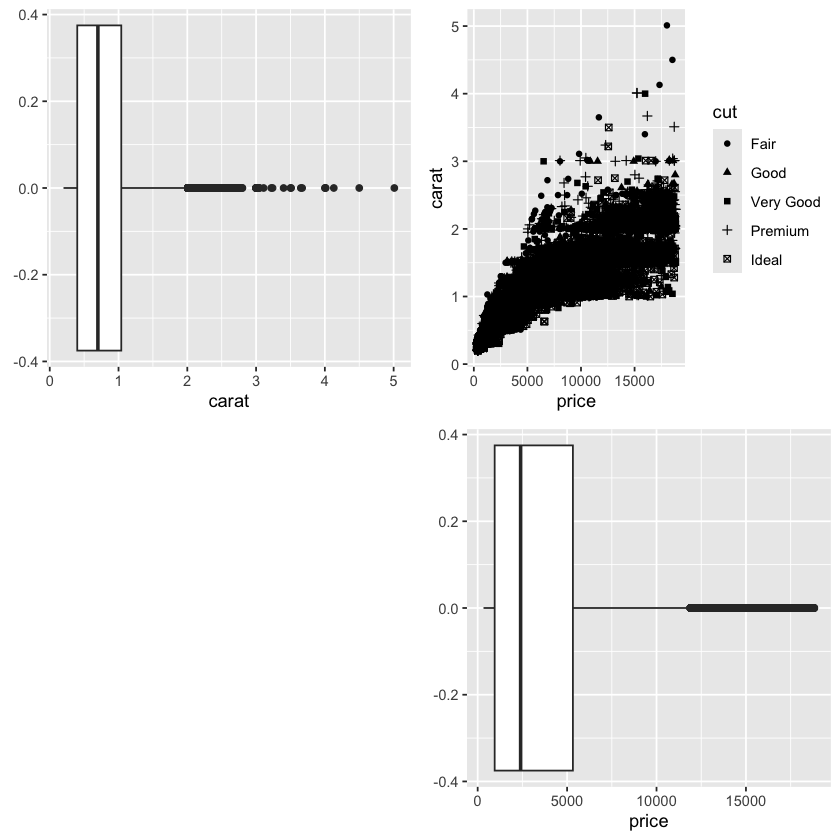

In [25]:
#Let's see how this looks
plot_grid(boxplot_carat,scatter_plot,NA, boxplot_price, nrow=2, ncol=2)


#Kind of what we want, but the boxplots don't look right
#let's modify them with a theme

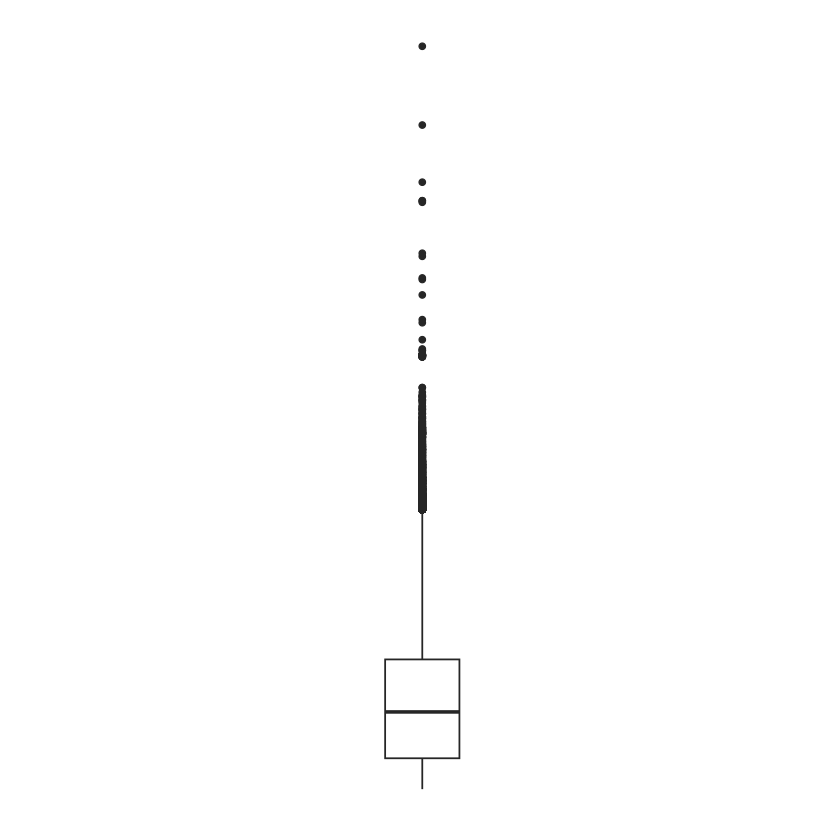

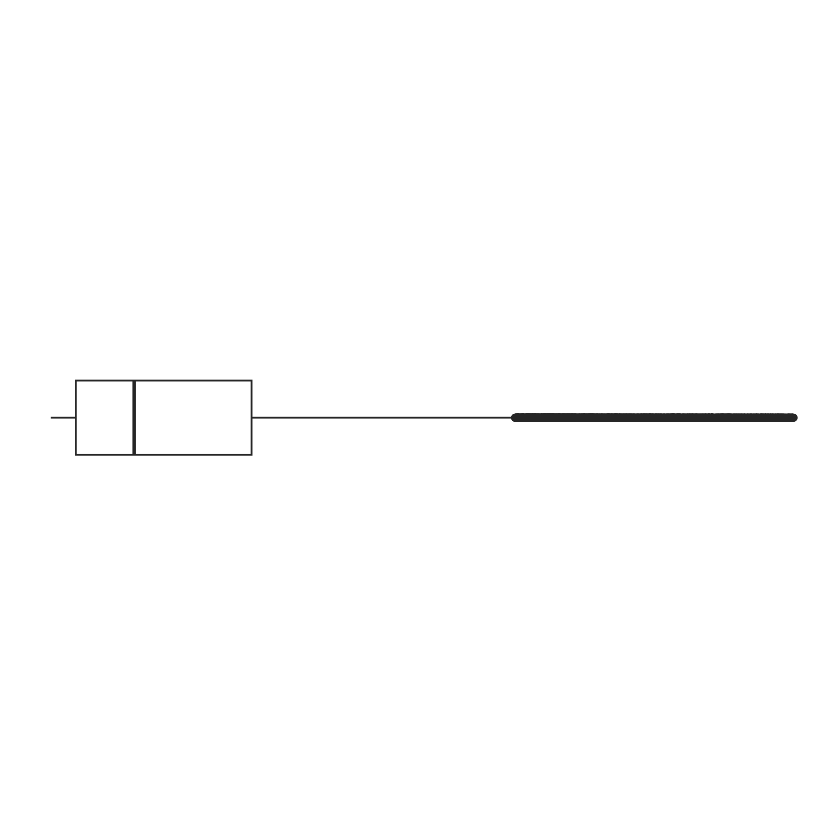

In [29]:
#If we want the boxplots to look like in the image, we need to remove the grid and all of the axes
#In ggplot, all such visual elements are done by editing the graphs theme

#we can remove the background with theme_minimal, but the rest will require our own custom theme
minimalist_theme = function() {
theme(axis.title.x=element_blank(),
                      axis.text.x=element_blank(),
                      axis.ticks.x=element_blank(),
                      axis.title.y=element_blank(),
                      axis.text.y=element_blank(),
                      axis.ticks.y=element_blank(),
                      panel.grid.major = element_blank(), 
                      panel.grid.minor = element_blank(),
                      
     )
}

#Like anything else in ggplot, we can stack themes on top of each other
boxplot_carat_themed = boxplot_carat  + theme_minimal() + minimalist_theme() + coord_flip()  + theme(aspect.ratio = 10) 
boxplot_price_themed = boxplot_price + theme_minimal() + minimalist_theme() + theme(aspect.ratio = 0.1)

boxplot_carat_themed
boxplot_price_themed


Warning message:
“Using shapes for an ordinal variable is not advised”


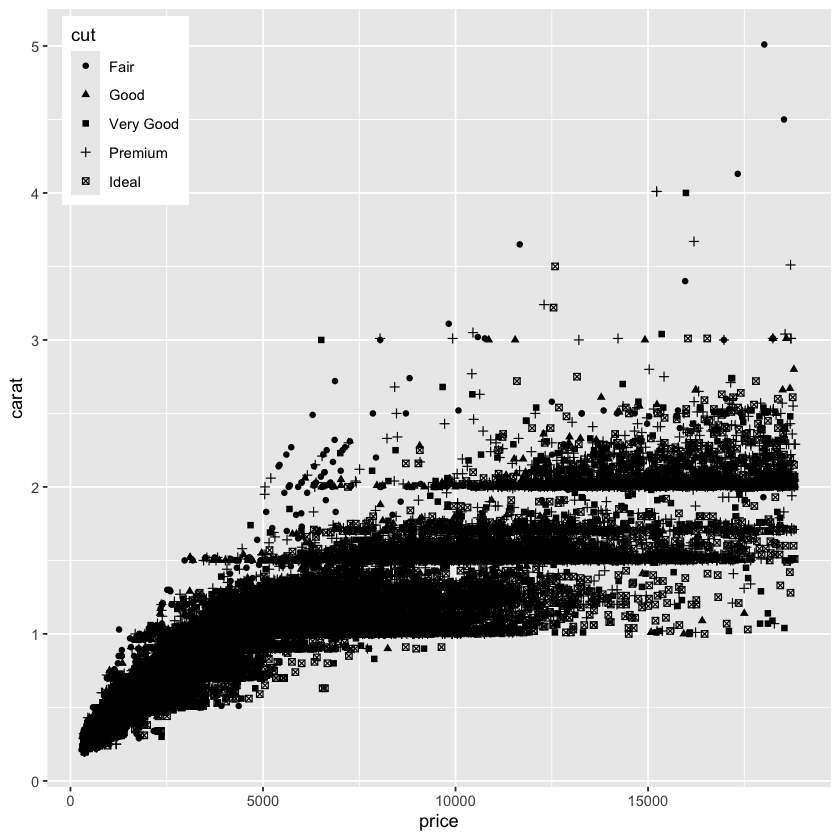

In [30]:
scatter_plot_themed = scatter_plot + theme(
    legend.position="inside",
    legend.position.inside=c(0.1,0.87)
)
scatter_plot_themed

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message in as_grob.default(plot):
“Cannot convert object of class logical into a grob.”


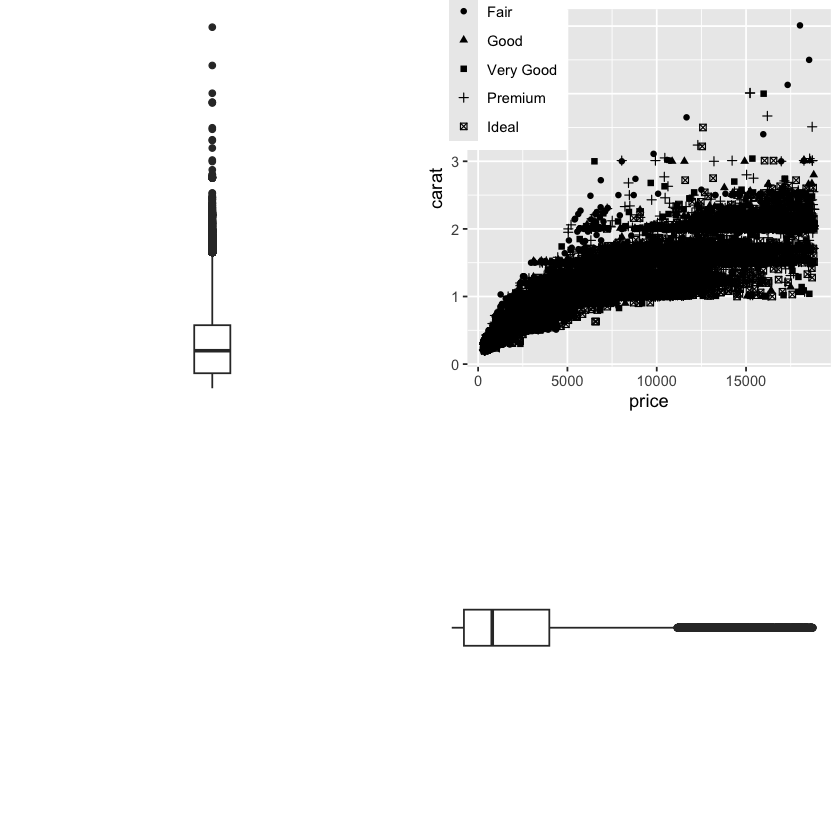

In [31]:
#Now our graphs look like we want them, but if we plot them it doesn't look quite right
plot_grid(boxplot_carat_themed,scatter_plot_themed,NA, boxplot_price_themed, 
          nrow=2, ncol=2)

#This is because by default, plot_grid wants each subplot to have the same dimensions
#Which results in a lot of wasted space in our barplots

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message in as_grob.default(plot):
“Cannot convert object of class logical into a grob.”


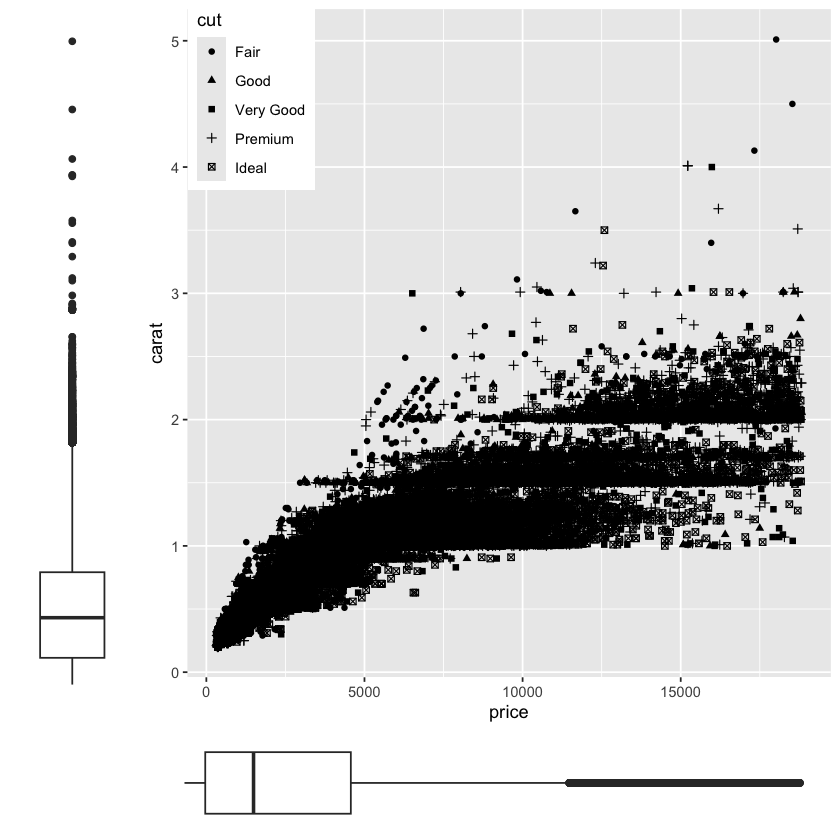

In [32]:
#We can fix this by manually setting the widths and heights of each column
plot_grid(boxplot_carat_themed,scatter_plot_themed,NA, boxplot_price_themed, 
          nrow=2, ncol=2,
          rel_widths = c(0.2, 1), rel_heights=c(1,0.15))